# Gradient Descent with SGD Regresser

## Gradient Descent

Question: What is a loss function? (Explain it in terms of the relationship between true and predicted values) 


Question: What loss functions do we know?

To solidify our knowledge of gradient descent, we will use Sklearn's stochastic gradient descent algorithm for regression [SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html#regression).   Sklearn classifiers share many methods and parameters, such as fit/predict, but some have useful additions.  SGDRegressor has a new method called partial_fit, which will allow us to inspect the calculated coefficients after each step of gradient descent.  

We will use the diabetes dataset for this task.  

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes(as_frame=True)
X = data['data']
y = data['target']

In [2]:
X.shape

(442, 10)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
from sklearn.linear_model import SGDRegressor

In [51]:
# Instantiate a SGDRegressor object and run partial fit on X and y. For now, pass the argument `penalty=None`

sgd = SGDRegressor(verbose=True, shuffle=False)

sgd.partial_fit(X, y)

-- Epoch 1
Norm: 4.51, NNZs: 10, Bias: 110.052407, T: 442, Avg. loss: 6421.159809
Total training time: 0.00 seconds.


SGDRegressor(shuffle=False, verbose=True)

In [54]:
sgd.__dict__

{'loss': 'squared_loss',
 'penalty': 'l2',
 'learning_rate': 'invscaling',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': False,
 'random_state': None,
 'verbose': True,
 'eta0': 0.01,
 'power_t': 0.25,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 1000,
 'tol': 0.001,
 'n_features_in_': 10,
 'coef_': array([ 0.44416674,  0.09272025,  2.41540179,  1.65523776,  0.46116567,
         0.30219402, -1.59760452,  1.50234556,  2.24206551,  1.18817065]),
 'intercept_': array([110.0524071]),
 't_': 443.0,
 'n_iter_': 1}

In [6]:
# Inspect the coefficient array
sgd.coef_

array([ 1.22994646,  0.218322  ,  2.69625122,  2.1353385 ,  0.73560254,
        0.63952403, -1.8717667 ,  1.81063611,  2.48143564,  1.78452272])

In [7]:
# Import mean_squared_error from metrics, and pass in the true ys, an array of predictions
# and the agrument squared = False
from sklearn.metrics import mean_squared_error

mean_squared_error(y, sgd.predict(X))

7731.375892577019

In [8]:
# Repeat the partial fit. Inspect, RMSE, coefficients.
sgd.partial_fit(X,y)


SGDRegressor()

In [9]:
mean_squared_error(y, sgd.predict(X))

6196.955722592424

Pick a coefficient, and explain the gradient descent update.


In [10]:
sgd.coef_

array([ 1.84613408,  0.38237494,  4.58671681,  3.56620991,  1.39158369,
        1.18652216, -3.17808391,  3.21295126,  4.30489664,  3.03294265])

In [11]:
# code
coef_0 = []
loss = []

sgd = SGDRegressor(penalty=None)
for _ in range(1000):
    sgd.partial_fit(X,y)
    coef_0.append(sgd.coef_[0])
    loss.append(mean_squared_error(y, sgd.predict(X)))

In [12]:
sgd.coef_

array([  48.0782753 ,  -41.76199141,  279.71350776,  193.49884349,
         32.74502956,    4.18653585, -156.91354173,  138.08909971,
        245.76772464,  133.619355  ])

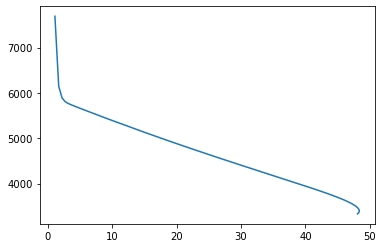

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(coef_0, loss)

In [14]:
# code
sgd.fit(X,y)

/Users/johnmaxbarry/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(penalty=None)

In [15]:
sgd.coef_

array([  47.85633699,  -41.94791243,  279.69380348,  193.57018935,
         32.77106611,    4.18556896, -156.9075491 ,  138.12171699,
        245.73931271,  133.71803825])

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)
lr.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

# Standard Scale

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_sc = ss.fit_transform(X)

In [31]:
sgd_sc = SGDRegressor(max_iter=100000, loss='squared_loss', tol=.0000001, penalty='L2', random_state=10)
sgd_sc.fit(X_sc, y)

SGDRegressor(max_iter=100000, penalty='L2', random_state=10, tol=1e-07)

In [32]:
sgd_sc.coef_

array([ -0.06013269, -11.19919526,  25.25185555,  15.47389646,
        -4.81608705,  -3.88735721,  -9.24276519,   5.43817333,
        23.47472465,   3.57523312])

In [33]:
mean_squared_error(y, sgd_sc.predict(X_sc))

2878.8996435257673

In [34]:
lr_sc = LinearRegression()
lr.fit(X_sc, y)
lr.coef_

array([ -0.47623169, -11.40703082,  24.72625713,  15.42967916,
       -37.68035801,  22.67648701,   4.80620008,   8.422084  ,
        35.73471316,   3.21661161])

In [35]:
mean_squared_error(y, lr.predict(X_sc))

2859.6903987680657

In [36]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.0001)
ridge.fit(X_sc, y)

Ridge(alpha=0.0001)

In [37]:
ridge.coef_

array([ -0.47622626, -11.40702246,  24.72626393,  15.42967266,
       -37.67939835,  22.67572552,   4.80577612,   8.42196851,
        35.73434931,   3.21661733])

In [38]:
mean_squared_error(y, ridge.predict(X_sc))

2859.690398783778